# Convolutional Neural Networks (CNNs

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
import matplotlib.pyplot as plt

### Load the dataset

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [9]:
assert X_train.shape[0] == y_train.shape[0]

### Normalize pixel values to be between 0 and 1

In [10]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5000, 32, 32, 3) (5000, 1)
(10000, 32, 32, 3) (10000, 1)


### Build the CNN model

In [12]:
model = models.Sequential()

### First Convolutional Layer

In [13]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\Fahan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Second Convolutional Layer

In [14]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

### Third Convolutional Layer

In [15]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Flatten the feature maps

In [16]:
model.add(layers.Flatten())

### Fully Connected Layer (Dense Layer)

In [17]:
model.add(layers.Dense(64, activation='relu'))

### Output Layer (10 classes for CIFAR-10)

In [18]:
model.add(layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [21]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.1751 - loss: 2.1852 - val_accuracy: 0.2693 - val_loss: 1.8708
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.3395 - loss: 1.7588 - val_accuracy: 0.3588 - val_loss: 1.8082
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.4100 - loss: 1.6370 - val_accuracy: 0.4254 - val_loss: 1.5362
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.4563 - loss: 1.4892 - val_accuracy: 0.4467 - val_loss: 1.5293
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.5186 - loss: 1.3606 - val_accuracy: 0.4864 - val_loss: 1.4208
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.5360 - loss: 1.2929 - val_accuracy: 0.4871 - val_loss: 1.4506
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.5781 - loss: 1.2035 - val_accuracy: 0.5029 - val_loss: 1.4119
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.5990 - loss: 1.1189 - val_ac

### Evaluate

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.5212 - loss: 1.3634


In [23]:
print(f'\nTest accuracy: {test_acc}')


Test accuracy: 0.5212000012397766


### Plot the Results

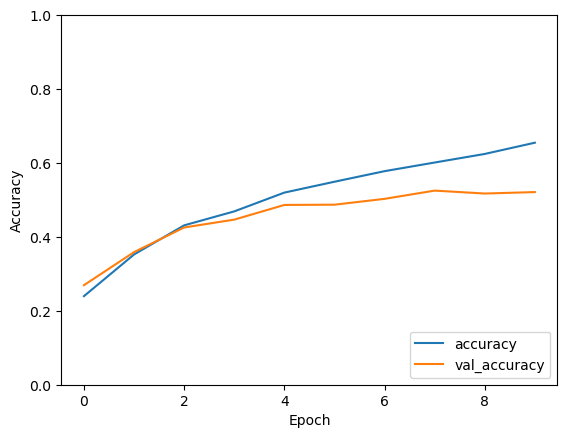

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

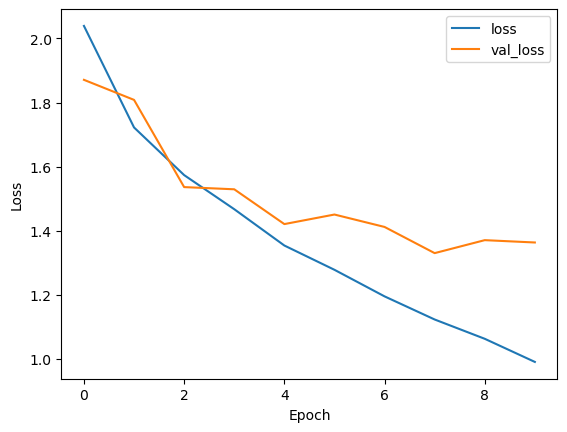

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()